# <i>Supervised Learning</i> 

# Tutorial Linear Regresion

As a refresher, we will start by learning how to implement linear regression. The main idea is to get familiar with objective functions, computing their gradients and optimizing the objectives over a set of parameters. These basic tools will form the basis for more sophisticated algorithms later. Readers that want additional details may refer to the <a href="http://cs229.stanford.edu/notes/cs229-notes1.pdf">Stanford CS229 Notes</a> on Supervised Learning for more.

To perform supervised learning, we must decide how we’re going to represent functions/hypotheses $h$ in a computer. As an initial choice, let’s say we decide to approximate $y$ as a linear function of $x$:

$$h_\theta(x) = \theta_0+\theta_1x_1+\theta_2x_2$$

Here, the $\theta_i$ are the parameters (also called weights) parameterizing the space of linear functions mapping from
$X$ to $Y$. To simplify our notation, we also introduce the convention of letting $x_0 = 1$ (this is the intercept term).



Our goal is to find a function $y=h(x)$ so that we have $y^{(i)} \approx h(x^{(i)})$ for each training example. To find a function $h(x)$ where $y^{(i)} \approx h(x^{(i)})$ we must first decide how to represent the function $h(x)$. To start out we will use linear functions:

$$h_\theta(x) = \sum_j^n \theta_j x_j = \theta^\top x$$

Where on the right-hand side above we are viewing $\theta$ and $x$ both as vectors, and here $n$ is the number of input variables/features (not counting $x_0$). Here, $h_\theta(x)$ represents a large family of functions parametrized by the choice of $\theta$. (We call this space of functions a “hypothesis class”.) With this representation for $h$, our task is to find a choice of $\theta$ so that $h(x^{(i)})$ is as close as possible to $y(i)$. In particular, we will search for a choice of $\theta$ that minimizes:
$$
J(\theta) = \frac{1}{2} \sum_i^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 = \frac{1}{2} \sum_i^m \left( \theta^\top x^{(i)} - y^{(i)} \right)^2
$$

The index $m$ is number data (instance) and this function is the <b>"cost function"</b> for our problem, which measures how much error is incurred in predicting $y^{(i)}$ for a particular choice of $\theta$. This may also be called a "loss", "penalty" or "objective" function.

There are many algorithms for minimizing functions like this one and we will describe some very effective ones that are easy to implement. Let’s consider the <b>Gradient Descent</b> algorithm, which starts with some initial $\theta$, and repeatedly performs the update:
$$
\theta_j:=\theta_j - \alpha \frac{\partial }{\partial \theta_j} J(\theta)
$$
(This update is simultaneously performed for all values of $j = 0, . . . , n$.). Here, $\alpha$ is called the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of $J$.
Differentiating the cost function $J(θ)$ as given above with respect to a particular parameter $\theta_j$ gives us:
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \sum_i x^{(i)}_j \left(h_\theta(x^{(i)}) - y^{(i)}\right)
$$

## Demo Linear Regresion

In [1]:
import theano as th
import numpy as np
import matplotlib.pyplot as plt
from theano import tensor as T

In [2]:
# Generate xdata input
xdata = np.linspace(-1, 1, 101)

# likes: y = mx + c  
# Generate ydata output
ydata = 5 * xdata + np.random.randn(*xdata.shape) * 0.33

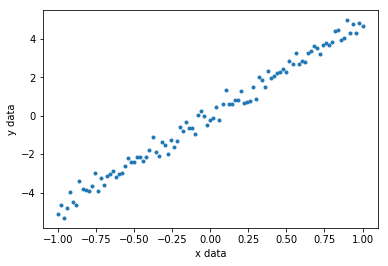

In [3]:
# Show/Plot generated data ydata by xdata
plt.plot(xdata, ydata, '.')
plt.ylabel('y data')
plt.xlabel('x data')
plt.show()

In [18]:
# Initialize theano variables

# learning rate
alph = 0.01

# X, Y input as scalar
x = T.dscalar()
y = T.dscalar()

# w shared var as float 
# w is a gradient in cartesian quadrant base on above plot
w = th.shared(0., name='w')

# Prediction function as a linear function, y = m*x, w as m (slope), y predicted
f_pred = x * w

# square error function
f_err = T.sqr(f_pred - y)

# Cost function as a mean of all square (quadrat) error data / J(theta)
f_cost = T.mean(f_err)

# Compute Gradient of cost w (theta)
gw = T.grad(cost=f_cost, wrt=w)

f_upd = [[w, w - (alph * gw)]]


In [19]:
# Compile the training function

f_train = th.function(inputs=[x, y], outputs=[f_pred, f_err], updates=f_upd)

In [20]:
# W before train
print('w before train: %f ' % w.get_value())

w before train: 0.000000 


In [53]:
# Training Process
epoch = 100
for i in range(epoch):
    for x_, y_ in zip(xdata, ydata):
        pred, err = f_train(x_, y_)

print(i, '%.2f'%y_ , '%.2f'%pred, '%.4f'%err)

(99, '4.69', '4.87', '0.0312')


In [8]:
# W after train, W is something around 5 as a mention in ydata equation.
print('w after train: %f ' % w.get_value())

w after train: 4.865888 


In [14]:
# Predict y from xtest using W value have got from training
xtest = 0.5
ypred = xtest * w
print("Predicted: for xtest = %f then ypred = %f " % (xtest, float(ypred.eval())))

Predicted: for xtest = 0.500000 then ypred = 2.432944 
